In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exploratory data analysis

In [2]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Visualization

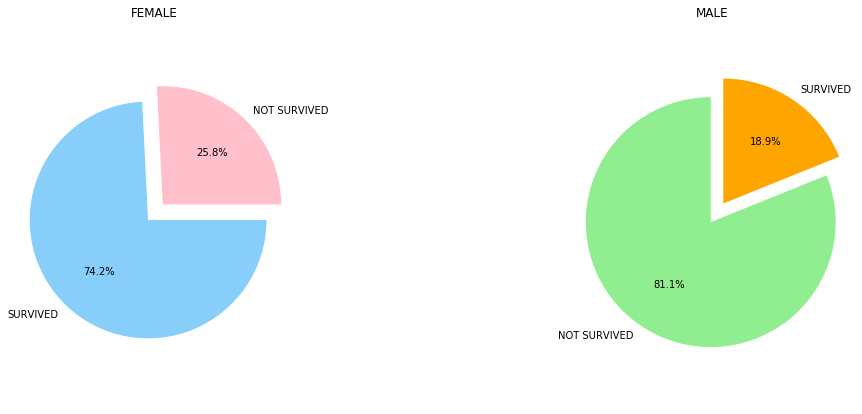

In [3]:
table = pd.pivot_table(data=train, values='PassengerId', index='Sex', columns='Survived', aggfunc='count')
pie_female = table.loc['female']
pie_male = table.loc['male']
# Create the figure with one row and two columns. Figsize will define the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
explode = (0.08, 0.1)
# Create the pie chart on the first position with the given configurations
pie_1 = axes[0].pie(pie_female,explode=explode, labels=['NOT SURVIVED','SURVIVED'],
                    autopct='%1.1f%%', colors=['pink', 'lightskyblue'])
# Define this plot title
axes[0].set_title('FEMALE')
# Make both axes equal, so that the chart is round
axes[0].axis('equal')
# the second pie chart
pie_2 = axes[1].pie(pie_male,explode=explode, labels=['NOT SURVIVED','SURVIVED'], 
                    autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
axes[1].set_title('MALE')
plt.axis('equal')
# space between the two charts
plt.subplots_adjust(wspace=1)
plt.show()

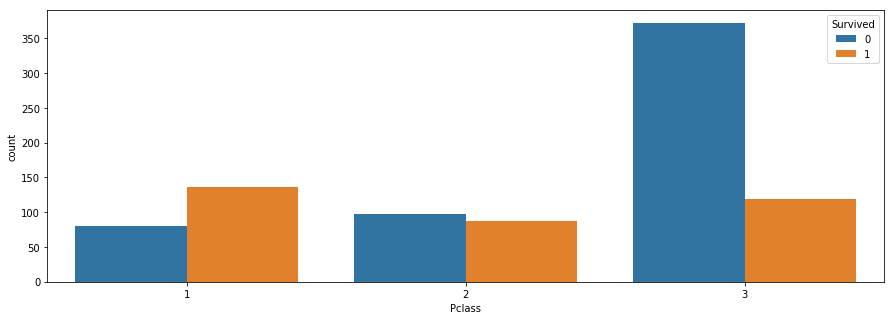

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x="Pclass", hue="Survived")

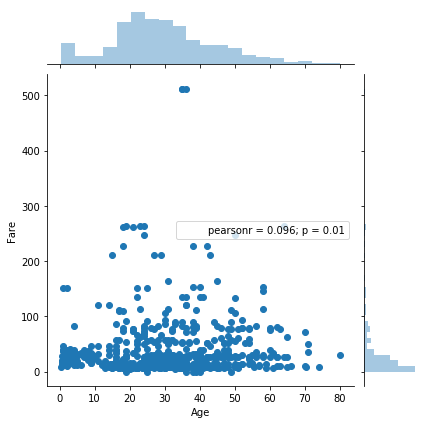

In [5]:
plt.figure(figsize=(15,5))
sns.jointplot(x='Age', y='Fare', data=train)

# collecting data for processing

In [6]:
#columns_target=['Survived']
column_train=['Age','Pclass','Sex','Fare']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [7]:
#preparing data so that there is no incompatible value in data
#check missing value 
X['Sex'].isnull().sum()
X['Pclass'].isnull().sum()
X['Fare'].isnull().sum()
X['Age'].isnull().sum()


177

In [8]:
#now we have to fill all the missing values
#age have 177  missing values
#either we fill missing values with mean or median form existing values 
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0

# Feature engineering

In [9]:
#now we need to convert sex into integer value 
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

# Modelling 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [11]:
X.head()
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# SVM

In [12]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
print(clf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [13]:
from sklearn import metrics
Y_pred=clf.predict(X_test)
print("accuracy",metrics.accuracy_score(Y_test,Y_pred))
print("accuracy",metrics.precision_score(Y_test,Y_pred))

accuracy 0.805970149254
accuracy 0.738636363636


In [14]:
print(clf.predict(X_test[0:10]))
prediction_svm=round(clf.score(X_test,Y_test)*100,2)
print(prediction_svm)

[0 0 0 1 1 0 0 0 0 0]
80.6


# Naive Bayes

In [15]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
prediction_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Decision Tree

In [16]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test)  
prediction_decisiontree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Logistic Regression

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
prediction_logistic = round(logreg.score(X_train, Y_train) * 100, 2)

# Final Test Scores

In [18]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression', 'Naive Bayes', 'Decision Tree'],
    'Score': [prediction_svm, prediction_logistic, prediction_gaussian, prediction_decisiontree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.23,Decision Tree
80.60,Support Vector Machines
77.85,Logistic Regression
76.24,Naive Bayes


Now According to above prediction score we found that decision tree perform better so for TEST data we use decision tree, for survived prediction.

We only use some feature of test data set.  we convert sex data type. We also check for missing value. And fill the missing value with either mean or median.

In [19]:
column_test=['Age','Pclass','Sex','Fare']
t=test[column_test]

d={'male':0, 'female':1}
t['Sex']=t['Sex'].apply(lambda x:d[x])


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [20]:
X['Sex'].isnull().sum()
X['Pclass'].isnull().sum()
X['Fare'].isnull().sum()
#filling missing values
t['Fare']=t['Fare'].fillna(t['Fare'].median())
t['Fare'].isnull().sum()

X['Age'].isnull().sum()
# filling missing values
t['Age']=t['Age'].fillna(t['Age'].median())
t['Age'].isnull().sum()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0

In [21]:
# by using decision classifier we are predicting survived of test data set. 
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, Y) 
test_data = test.drop("PassengerId", axis=1).copy()
pred = decision_tree.predict(t)

In [22]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })

submission.to_csv('submission.csv', index=False)

In [23]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
